In [1]:
# general
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# For regular expression
import re

# custom functions
from functions import *

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\atkat\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Load the data

In [2]:
DATA_PATH = '../data/quotebank_attr_2015-2020.json.bz2'
df = pd.read_json(DATA_PATH)
df.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,speaker_qid,gender,nationality,date_of_birth,ethnic_group,occupation,party,academic_degree,domains
0,2015-10-05-010038,At Neath Food Festival with a vegetarian platt...,Bethan Jenkins,[Q4897688],2015-10-05 05:00:00,1,"[[Bethan Jenkins, 0.8565], [None, 0.1435]]",[http://www.southwales-eveningpost.co.uk/Town-...,E,Q4897688,None,None,None,None,None,None,None,[southwales-eveningpost.co.uk]
1,2015-11-28-006688,"But if I had to choose my favourite recipe, it...",Trish Deseine,[Q7843986],2015-11-28 00:00:00,1,"[[Trish Deseine, 0.7664], [None, 0.1125], [Kei...",[http://www.irishexaminer.com/lifestyle/featur...,E,Q7843986,None,None,None,None,None,None,None,[irishexaminer.com]
2,2015-11-10-015422,"Children are learning about responsibility, te...",David Price,"[Q1176177, Q16063598, Q20804677, Q20973688, Q3...",2015-11-10 19:30:41,1,"[[David Price, 0.7849], [None, 0.2151]]",[http://news.ifas.ufl.edu/2015/11/ufifas-bok-t...,E,None,None,None,None,None,None,None,None,[ufl.edu]
3,2015-01-16-054273,Once we have added all the vegetables and stoc...,None,[],2015-01-16 11:40:11,4,"[[None, 0.6778], [Catherine O'Neill, 0.3222]]",[http://www.bromsgrovestandard.co.uk/2015/01/1...,E,None,None,None,None,None,None,None,None,"[bromsgrovestandard.co.uk, bromsgrovestandard...."
4,2015-02-20-089622,vegans in a steakhouse.,Jim Gaffigan,[Q2093638],2015-02-20 00:05:44,1,"[[Jim Gaffigan, 0.7894], [None, 0.2106]]",[http://unfspinnaker.com/expect-jim-gaffigans-...,E,Q2093638,[male],[United States of America],[+1966-07-07T00:00:00Z],None,"[screenwriter, film producer, television actor...",None,None,[unfspinnaker.com]


# Preparation of the data

In [3]:
preprocess_dataframe(df)

In [4]:
# Perform the sentiment analysis 
analyzer = SentimentIntensityAnalyzer()
df['sentiment'] = df['quotation'].apply(lambda quote: get_sentiment(analyzer, quote))

In [5]:
# Select the quotations which have a date of birth
filtered_df = df.dropna(subset=['date_of_birth'])

In [6]:
def timestamp_to_datetime(date_str):
    """
    Convert the wikipedia timestamp to the datetime format.
    """
    match = re.findall('\d{4}-\d{2}-\d{2}', date_str)[0]
    match = re.split('-00', match, 1)[0]
    return pd.to_datetime(match, errors='coerce')

In [7]:
# Transform the timestamp format
filtered_df['date_of_birth'] = filtered_df.date_of_birth.apply(lambda list_date: timestamp_to_datetime(list_date[0]))

C:\Users\atkat\AppData\Local\Temp/ipykernel_14144/2768405995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date_of_birth'] = filtered_df.date_of_birth.apply(lambda list_date: timestamp_to_datetime(list_date[0]))


In [8]:
cleaned_df = filtered_df.dropna(subset=['date_of_birth'])
cleaned_df.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,speaker_qid,gender,nationality,date_of_birth,ethnic_group,occupation,party,academic_degree,domains,sentiment
4,2015-02-20-089622,vegans in a steakhouse.,Jim Gaffigan,[Q2093638],2015-02-20 00:05:44,1,"[[Jim Gaffigan, 0.7894], [None, 0.2106]]",[http://unfspinnaker.com/expect-jim-gaffigans-...,E,Q2093638,[male],[United States of America],1966-07-07,None,"[screenwriter, film producer, television actor...",None,None,[unfspinnaker.com],neutral
16,2015-06-22-006979,Doctors said she was in a permanent vegetative...,Jeb Bush,[Q221997],2015-06-22 19:00:00,1,"[[Jeb Bush, 0.8999], [None, 0.0665], [Ted Cruz...",[http://www.care2.com/causes/5-takeaways-from-...,E,Q221997,[male],"[United States of America, Spain]",1953-02-11,None,"[banker, politician, real estate developer, bo...",[Republican Party],[Bachelor of Arts],[care2.com],neutral
31,2015-06-17-060246,"This has always disgusted me, because I've alw...",Zahia Dehar,[Q3574603],2015-06-17 11:38:03,1,"[[Zahia Dehar, 0.7367], [None, 0.2633]]",[http://femalefirst.co.uk/womens-issues/zahia-...,E,Q3574603,[female],"[France, Algeria]",1992-02-25,None,"[model, fashion designer, actor]",None,None,[femalefirst.co.uk],negative
41,2015-09-02-009681,At home I get dishes from different parts of t...,Shraddha Kapoor,[Q15055683],2015-09-02 14:41:29,1,"[[Shraddha Kapoor, 0.6786], [None, 0.3214]]",[http://www.thehindu.com/features/metroplus/fi...,E,Q15055683,[female],[India],1987-03-03,None,"[film actor, model]",None,None,[thehindu.com],positive
45,2015-09-12-052816,The Shiv Sena will not protest and does not en...,Aditya Thackeray,[Q4683091],2015-09-12 14:26:00,1,"[[Aditya Thackeray, 0.8406], [None, 0.1594]]",[http://www.newindianexpress.com/nation/Jains-...,E,Q4683091,[male],[India],1990-06-13,None,[politician],"[Yuva Sena, Shiv Sena]",None,[newindianexpress.com],negative


# Analysis

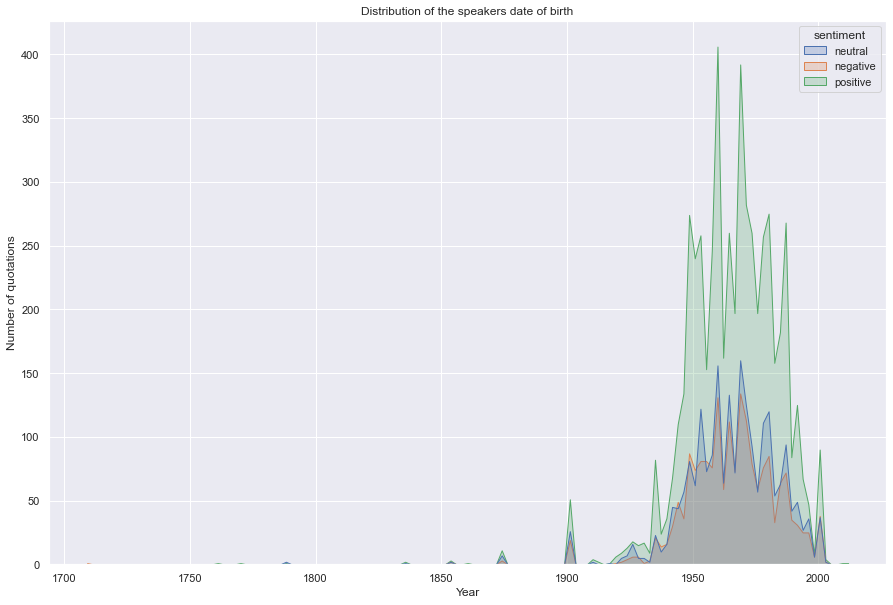

In [9]:
# Plot
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15, 10))
ax = sns.histplot(data=cleaned_df, x=cleaned_df.date_of_birth.apply(lambda date: date.year), hue='sentiment', element='poly')
title = ax.set_title('Distribution of the speakers date of birth')
xlabel = ax.set_xlabel('Year')
ylabel = ax.set_ylabel('Number of quotations')

In [10]:
# Find the more frequent years
cleaned_df.date_of_birth.apply(lambda date: date.year).value_counts()[:3]

1949    366
1969    363
1961    321
Name: date_of_birth, dtype: int64